

<h1 style="border: 2px solid black; padding: 15px; border-radius: 12px;" align='center'>IA pour la cyber</h1>    

<h2 align='center'> Introduction au NLP </h2>

<h3 align='center'> Jordy Palafox </h3>
<h3 align='center'> Ing3 CS - 2024/2025 </h3>
      
      
<div style="display:flex"> 
    <img src="cytech.png", style="width:250px;height:50"> 
    <img src="cy.jpg", style="width:300px;height:100px"> 
</div> 

Dans ce TP, nous allons faire de la classification de requêtes SQL. Le but est de déterminer si une requête SQl a été comprise ou non. 

Le dataset est disponible à l'adresse suivante : https://www.kaggle.com/datasets/sajid576/sql-injection-dataset/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Modified_SQL_Dataset.csv')

In [3]:
df

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [4]:
compte_classes = df['Label']

(array([19537.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11382.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

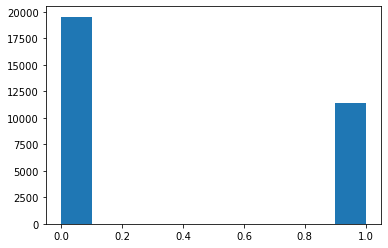

In [5]:
plt.hist(compte_classes)

# Partie 1 : **Approche fréquentiste** 

On va aborder dans cette partie rapide l'approche fréquentiste avec CountVectorizer et TdIDF avec des modèles de classifications "basiques"

In [15]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
from nltk.corpus import stopwords
import seaborn as sns

warnings.filterwarnings('ignore')

In [7]:
X = df['Query']
y = df['Label']

In [8]:
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))

In [9]:
X1 = vectorizer.fit_transform(X.values.astype('U')).toarray()

X2 = tfidf.fit_transform(X.values.astype('U')).toarray()

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state=1)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(24735, 6594)
(24735,)
(6184, 6594)
(6184,)


In [11]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state=1)

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(24735, 6594)
(24735,)
(6184, 6594)
(6184,)


CPU times: user 1.61 s, sys: 516 ms, total: 2.12 s
Wall time: 2.12 s
Modèle Gaussian NB avec CountVectorizer
Accuracy of Naive Bayes on test set : 0.8203428201811126
F1 Score of Naive Bayes on test set : 0.8053267916593656
sensitivity= 0.9862660944206009
specificity= 0.7200311364815776
Precision= 0.6804856381403612
CPU times: user 1.29 s, sys: 421 ms, total: 1.71 s
Wall time: 1.71 s
Modèle Gaussian NB avec Tfidf
Accuracy of Naive Bayes on test set : 0.818078913324709
F1 Score of Naive Bayes on test set : 0.8022499560555457
sensitivity= 0.9793991416309012
specificity= 0.720550077841204
Precision= 0.6793688597796963


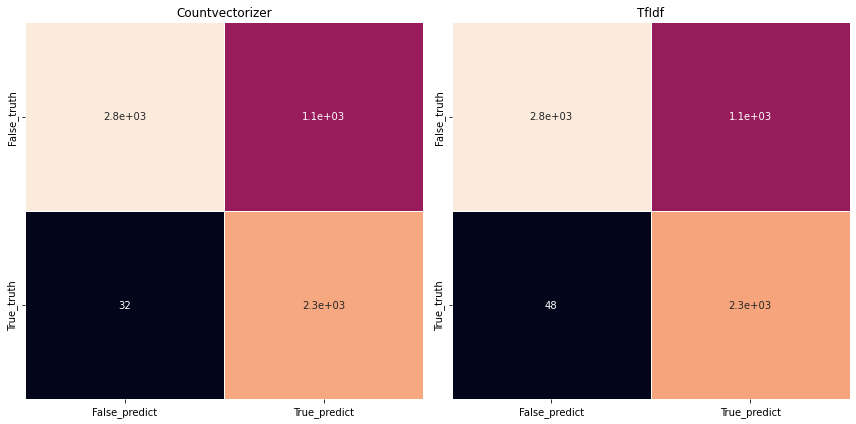

In [34]:
nb_clf = GaussianNB()
%time nb_clf.fit(X1_train, y1_train)
y_pred = nb_clf.predict(X1_test)

print("Modèle Gaussian NB avec CountVectorizer")

print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y1_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y1_test)}")

confusion1 = confusion_matrix(y1_test, y_pred)

TP = confusion1[1, 1]
TN = confusion1[0, 0]
FP = confusion1[0, 1]
FN = confusion1[1, 0]

sensitivity = TP / float(FN + TP)
print("sensitivity=",sensitivity)

specificity = TN / (TN + FP)
print("specificity=",specificity)

Precision = TP / float(TP + FP)
#Recall = TP / float(TP + FN)
#F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)



print('===============================================================')


nb_clf = GaussianNB()
%time nb_clf.fit(X2_train, y2_train)
y_pred = nb_clf.predict(X2_test)

print("Modèle Gaussian NB avec Tfidf")

print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y2_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y2_test)}")

confusion2 = confusion_matrix(y2_test, y_pred)

TP = confusion2[1, 1]
TN = confusion2[0, 0]
FP = confusion2[0, 1]
FN = confusion2[1, 0]

sensitivity = TP / float(FN + TP)
print("sensitivity=",sensitivity)

specificity = TN / (TN + FP)
print("specificity=",specificity)

Precision = TP / float(TP + FP)
#Recall = TP / float(TP + FN)
#F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

print('=='*50)

# Créer une figure avec 2 sous-graphes côte à côte (1 ligne, 2 colonnes)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 12x6 est la taille de la figure

# Dessiner la première heatmap dans le premier subplot (ax1)
sns.heatmap(pd.DataFrame(confusion1,  \
                         columns=['False_predict', 'True_predict'], \
                         index=['False_truth', 'True_truth']),ax=ax1, annot=True, linewidth=.5, cbar=False)

# Dessiner la deuxième heatmap dans le second subplot (ax2)
sns.heatmap(pd.DataFrame(confusion2, \
                         columns=['False_predict', 'True_predict'], \
                         index=['False_truth', 'True_truth']), ax=ax2,annot=True, linewidth=.5, cbar=False)

# Ajouter un titre pour chaque heatmap
ax1.set_title("Countvectorizer")
ax2.set_title("TfIdf")

# Afficher la figure
plt.tight_layout()  # Ajuster la disposition pour éviter les chevauchements
plt.show()

CPU times: user 1min 29s, sys: 22.8 s, total: 1min 52s
Wall time: 18.3 s
Modèle Regression Logistique avec CountVectorizer
Accuracy of Naive Bayes on test set : 0.9401681759379042
F1 Score of Naive Bayes on test set : 0.9152542372881355
sensitivity= 0.8575107296137339
specificity= 0.9901401141670991
Precision= 0.981335952848723
CPU times: user 1min 37s, sys: 21.2 s, total: 1min 58s
Wall time: 19.3 s
Modèle Regression Logistique avec Tfidf
Accuracy of Naive Bayes on test set : 0.9196313065976714
F1 Score of Naive Bayes on test set : 0.8813559322033899
sensitivity= 0.792274678111588
specificity= 0.9966268811624286
Precision= 0.993006993006993


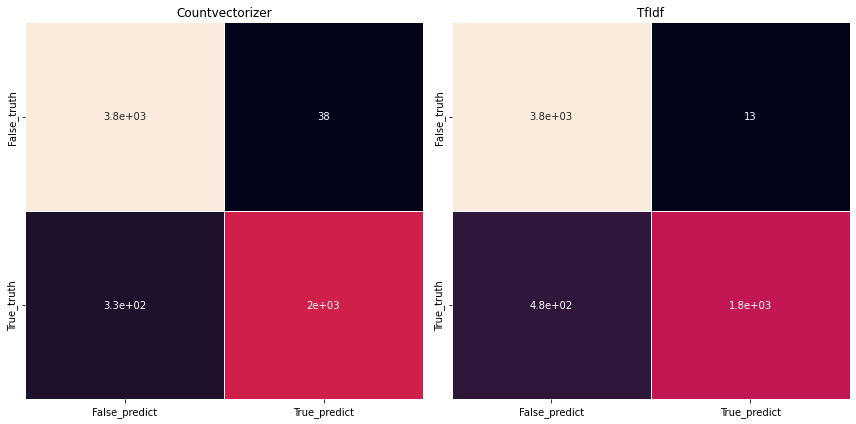

In [36]:
nb_clf = LogisticRegression()
%time nb_clf.fit(X1_train, y1_train)
y_pred = nb_clf.predict(X1_test)

print("Modèle Regression Logistique avec CountVectorizer")

print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y1_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y1_test)}")

confusion1 = confusion_matrix(y1_test, y_pred)

TP = confusion1[1, 1]
TN = confusion1[0, 0]
FP = confusion1[0, 1]
FN = confusion1[1, 0]

sensitivity = TP / float(FN + TP)
print("sensitivity=",sensitivity)

specificity = TN / (TN + FP)
print("specificity=",specificity)

Precision = TP / float(TP + FP)
#Recall = TP / float(TP + FN)
#F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)



print('===============================================================')


nb_clf = LogisticRegression()
%time nb_clf.fit(X2_train, y2_train)
y_pred = nb_clf.predict(X2_test)

print("Modèle Regression Logistique avec Tfidf")

print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y2_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y2_test)}")

confusion2 = confusion_matrix(y2_test, y_pred)

TP = confusion2[1, 1]
TN = confusion2[0, 0]
FP = confusion2[0, 1]
FN = confusion2[1, 0]

sensitivity = TP / float(FN + TP)
print("sensitivity=",sensitivity)

specificity = TN / (TN + FP)
print("specificity=",specificity)

Precision = TP / float(TP + FP)
#Recall = TP / float(TP + FN)
#F1 = 2*((Precision*Recall)/(Precision+Recall))
print ("Precision=",Precision)

print('=='*50)

# Créer une figure avec 2 sous-graphes côte à côte (1 ligne, 2 colonnes)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 12x6 est la taille de la figure

# Dessiner la première heatmap dans le premier subplot (ax1)
sns.heatmap(pd.DataFrame(confusion1,  \
                         columns=['False_predict', 'True_predict'], \
                         index=['False_truth', 'True_truth']),ax=ax1, annot=True, linewidth=.5, cbar=False)

# Dessiner la deuxième heatmap dans le second subplot (ax2)
sns.heatmap(pd.DataFrame(confusion2, \
                         columns=['False_predict', 'True_predict'], \
                         index=['False_truth', 'True_truth']), ax=ax2,annot=True, linewidth=.5, cbar=False)

# Ajouter un titre pour chaque heatmap
ax1.set_title("Countvectorizer")
ax2.set_title("TfIdf")

# Afficher la figure
plt.tight_layout()  # Ajuster la disposition pour éviter les chevauchements
plt.show()

# Approche par réseaux de neurones : RNN, LSTM, Transformers 

Dans ce notebook, nous ferons une première exploration dans l'**approche connexionniste**.

# Comment traiter du texte ? 

Un des premiers problèmes en NLP est la représentation du texte pour le rendre "compréhensible" par l'ordinateur.

Pour cela, on **vectorise** le texte, autrement dit on transforme le texte sous forme de tenseur.
Il existe plusieurs approches possibles : 
+ segmenter le texte en mots et chaque mot est représenté par un vecteur, 
+ segmenter le texte en caractères et chaque caractère est représenté par un vecteur, 
+ extraire des n-grammes qui sont des groupes de mots ou caractères qui se chevauchent.

*Exemple de n-grammes* : 
Prenons la phrase "Le chien joue et aboie"
2-grammes : {"Le", "Le chien", "chien joue", "joue", "joue et", "et", "et aboie", "aboie"}
On parle de **sac de mots** (**bag of words**).
    Si l'ordre ne compte pas, on peut s'intéresser à des notions de fréquences de n-grammes, c'est une approche *statistique*. Par exemple, les méthodes td-idf en font partie (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) Par exemple chercher les bi-grams donc les associations de 2 mots les plus fréquents.

On va ensuite transformer chaque unité en un token (jeton), c'est la **tokenisation** et décomposer notre texte (c'est l'*analyse lexicale* !).

On peut ensuite choisir entre deux méthodes : 
+ l'**encodage** des tokens en one-hot encoding => problème de sparsité !
+ le **plongement** de tokens (**word embedding**).

Remarque : on n'a pas encore parlé d'une autre étape de prétraitement : stemming, lemmatization, choix des stopwords (les mots communs qui n'apportent que peu d'informations au texte), retrait des majuscules etc. ça vient !

In [37]:
import tensorflow as tf 

gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        #Currenlty memory growth needs to be the same across GPUs
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical devices", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

2024-10-02 14:41:47.728837: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 14:41:47.735751: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 14:41:47.813019: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 14:41:47.881484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 14:41:47.956827: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

# Chargeons à nouveau notre jeu de données contenant les requêtes SQm

In [38]:
from tensorflow import keras
import pandas as pd, numpy as np

In [39]:
df = pd.read_csv('Modified_SQL_Dataset.csv')

In [40]:
df.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


# Prétraitement 
On va explorer la première étape : le nettoyage du texte ! 


In [41]:
import string, re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from tqdm import tqdm
import os
stop_words =set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/cytech/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cytech/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
# suppresion de la ponctuation, passage en minuscule, stemming, lemmatisation, stopwords

def clean_tweet(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    """
    Cette fonction va nettoyer le texte : 
    + mettre en minuscule, 
    + supprimer un certain nombre d'expression,
    + choix lemmatisation / stemming,
    + choix d'une liste de stopwords
    """
    
    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)
    
    ## transforme en tokens
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    
                    lst_stopwords]
                
    ## Stemming (supprime -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (retourne la racine du mot)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## liste => string
    text = " ".join(lst_text)
    return text


In [44]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/cytech/nltk_data...


True

In [45]:
df['clean'] = df['Query'].apply(lambda row : clean_tweet(row, flg_stemm=False, 
                                                      flg_lemm=True, lst_stopwords=stop_words))

In [46]:
df

,Query,Label,clean
0,""" or pg_sleep ( __TIME__ ) --",1,pg_sleep __time__
1,create user name identified by pass123 tempora...,1,create user name identified temporary tablespa...
2,AND 1 = utl_inaddr.get_host_address ( ...,1,= utl_inaddr.get_host_address select distinct ...
3,select * from users where id = '1' or @ @1 ...,1,select * user id = '' = union select version '
4,"select * from users where id = 1 or 1#"" ( ...",1,select * user id = union select version
...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,delete door grow = 'small'
30915,DELETE FROM tomorrow,0,delete tomorrow
30916,SELECT wide ( s ) FROM west,0,select wide west
30917,SELECT * FROM ( SELECT slide FROM breath ),0,select * select slide breath


In [10]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Il existe d'autres listes de stopwords disponibles, par exempel Spacy en propose une :

https://spacy.io/

# On va maintenant **Tokenizer**
Keras en propose un, NLTK, Spacy, vous pouvez aussi créer le votre !

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000,
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                     lower=True,
                     char_level=False #si True, chaque caractère est un token
                     )

On va séparer les données en train, val et test. 

En effet, le tokenizer va être entrainé sur les données d'entraînement.
Il se peut que de nouveaux mots apparaissent, le modèle ne les connaîtra donc pas.

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
df

,Query,Label,clean
0,""" or pg_sleep ( __TIME__ ) --",1,pg_sleep __time__
1,create user name identified by pass123 tempora...,1,create user name identified temporary tablespa...
2,AND 1 = utl_inaddr.get_host_address ( ...,1,= utl_inaddr.get_host_address select distinct ...
3,select * from users where id = '1' or @ @1 ...,1,select * user id = '' = union select version '
4,"select * from users where id = 1 or 1#"" ( ...",1,select * user id = union select version
...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,delete door grow = 'small'
30915,DELETE FROM tomorrow,0,delete tomorrow
30916,SELECT wide ( s ) FROM west,0,select wide west
30917,SELECT * FROM ( SELECT slide FROM breath ),0,select * select slide breath


In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    df['clean'], df['Label'], train_size=0.8, stratify=df['Label'], random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, train_size=0.8 ,stratify=y_train, random_state=42)

In [52]:
print("========== Données d'entraînement ========== \n", x_train,  "\n",
      "========== Données de validation ========== \n", x_test,  "\n",
      "========== Données de test ========== \n", x_val)

========== Données d'entraînement ========== 
 25443                             select count grandmother
15267                                            tronchuda
7866                                                     =
10139    ' = ctxsys.drithsx.sn chr ||chr ||chr ||chr ||...
16822                                                     
                               ...                        
9338                                         = = benchmark
27389                                         select * end
6822                                          union select
3280     ' = select count * all_users all_users all_use...
14204                                   de asbaje abarzuza
Name: clean, Length: 19788, dtype: object 
 ========== Données de validation ========== 
 8441                                          union select
7838                  ' = = select count * generate_series
13394                                                 eial
12134                                

Entrainons le tokenizer ! 

In [53]:
tokens = tokenizer.fit_on_texts(x_train)

In [54]:
tokenizer.document_count

19788

In [55]:
tokenizer.num_words

10000

In [56]:
tokenizer.index_word

{1: 'select',
 2: "'",
 3: 'chr',
 4: 'char',
 5: 'union',
 6: 'count',
 7: 'end',
 8: 'else',
 9: 'case',
 10: 'like',
 11: 'order',
 12: 'id',
 13: 'null',
 14: 'sysusers',
 15: 'sleep',
 16: 'users',
 17: "''",
 18: 'all',
 19: 'elt',
 20: 'join',
 21: 'row',
 22: 'top',
 23: 'dual',
 24: 'concat',
 25: 'first',
 26: 'fetch',
 27: 'avg',
 28: 'wp',
 29: 'percent',
 30: 'orders',
 31: 'sysibm',
 32: 'systables',
 33: 'domain',
 34: 'repeat',
 35: 'substring',
 36: 'x',
 37: 'value',
 38: 'regexp',
 39: 'employees',
 40: 'left',
 41: 'limit',
 42: 'post',
 43: 'user',
 44: 'sum',
 45: 'name',
 46: 'set',
 47: 'key',
 48: 'meta',
 49: 'distinct',
 50: 'posts',
 51: 'right',
 52: 'benchmark',
 53: 'asc',
 54: 'dbms',
 55: 'de',
 56: 'city',
 57: 'rlike',
 58: 'group',
 59: 'crypt',
 60: 'floor',
 61: 'series',
 62: 'generate',
 63: 'rand',
 64: 'pg',
 65: 'min',
 66: 'c',
 67: 'inner',
 68: 'extractvalue',
 69: 'price',
 70: 'make',
 71: 'rdbfields',
 72: 'rdbtypes',
 73: 'rdbcollations

Transforme le texte en liste de tokens pour chaque texte :

In [57]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_val_seq = tokenizer.texts_to_sequences(x_val)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [58]:
x_train_seq[0][:10]

[1, 6, 943]

In [59]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence

On transforme ensuite les listes d'entiers en tenseur 2D d'entiers de la forme (sample, maxlen)

In [61]:
word_index = tokenizer.word_index

maxlen = 300

x_train_pad = sequence.pad_sequences(x_train_seq, maxlen=maxlen)
x_val_pad = sequence.pad_sequences(x_val_seq, maxlen=maxlen)
x_test_pad = sequence.pad_sequences(x_test_seq, maxlen=maxlen)

In [1]:
x_train_pad

NameError: name 'x_train_pad' is not defined

# Construisons notre premier modèle 

On va réaliser un modèle extrèmement basique mais on va déjà introduire la notion d'Embedding

In [63]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [64]:
model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

A quoi correspond cette couche d'Embedding ? 

L'objectif est d'associer de manière logique un mot à un vecteur !
10000 correspond au nombre de tokens, 
8 est la dimension des vecteurs.

Voici un exemple :

In [66]:
Embedding(10000, 8, input_length = maxlen)(x_train_pad[0])

<tf.Tensor: shape=(300, 8), dtype=float32, numpy=
array([[-0.04514585, -0.03938425, -0.00239947, ...,  0.04175121,
         0.0073568 ,  0.01903805],
       [-0.04514585, -0.03938425, -0.00239947, ...,  0.04175121,
         0.0073568 ,  0.01903805],
       [-0.04514585, -0.03938425, -0.00239947, ...,  0.04175121,
         0.0073568 ,  0.01903805],
       ...,
       [-0.00904281,  0.04435262,  0.00191953, ..., -0.0414137 ,
        -0.0392107 ,  0.04151777],
       [-0.02648737,  0.04891262, -0.00636001, ..., -0.01073537,
         0.00763316, -0.00566732],
       [-0.02873131,  0.0386592 ,  0.02455593, ...,  0.01573241,
         0.0432188 , -0.03691918]], dtype=float32)>

In [67]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['acc'])

In [68]:
history = model.fit(x_train_pad, y_train, epochs=10, batch_size=32, validation_data=[x_val_pad, y_val])

Epoch 1/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6918 - loss: 0.5787 - val_acc: 0.9317 - val_loss: 0.2612
Epoch 2/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9330 - loss: 0.2133 - val_acc: 0.9440 - val_loss: 0.1512
Epoch 3/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9491 - loss: 0.1508 - val_acc: 0.9503 - val_loss: 0.1357
Epoch 4/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9553 - loss: 0.1266 - val_acc: 0.9555 - val_loss: 0.1315
Epoch 5/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9574 - loss: 0.1201 - val_acc: 0.9559 - val_loss: 0.1245
Epoch 6/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9607 - loss: 0.1123 - val_acc: 0.9563 - val_loss: 0.1216
Epoch 7/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9628 - loss: 0.1040 - val_acc: 0.9578 - val_loss: 0.1245
Epoch 8/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9616 - loss: 0.1057 - val_acc: 0.9578 - val_loss: 0.1192
Epoch 9/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

# Données de test ? 

In [69]:
loss, acc = model.evaluate(x_test_pad, y_test)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - acc: 0.9641 - loss: 0.1121


In [70]:
print(f"La perte est de {loss} et l'accuracy {acc}.")

La perte est de 0.11355379968881607 et l'accuracy 0.9645860195159912.


# Visualisation rapide

In [71]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss & Acc')

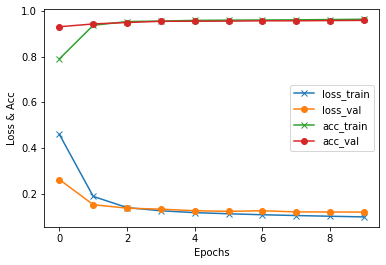

In [72]:
plt.plot(range(10),history.history['loss'], label="loss_train", marker='x')
plt.plot(range(10),history.history['val_loss'], label="loss_val", marker='o')
plt.plot(range(10),history.history['acc'], label="acc_train", marker='x')
plt.plot(range(10),history.history['val_acc'], label="acc_val", marker='o')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss & Acc')

# Comment aller plus loin ? 

Nous allons voir plusieurs pistes :
+ utiliser des embeddings de mots pré-entrainés : GloVe, Fastext, Word2Vec,
+ utiliser une architecture de réseaux ou des neurones plus appropriés !


## *Utiliser des embeddings pré-entrainés !*

## 1 . Glove

"The GloVe model is trained on the non-zero entries of a global word-word co-occurrence matrix, which tabulates how frequently words co-occur with one another in a given corpus. Populating this matrix requires a single pass through the entire corpus to collect the statistics. For large corpora, this pass can be computationally expensive, but it is a one-time up-front cost. Subsequent training iterations are much faster because the number of non-zero matrix entries is typically much smaller than the total number of words in the corpus.


The tools provided in this package automate the collection and preparation of co-occurrence statistics for input into the model. The core training code is separated from these preprocessing steps and can be executed independently."

https://nlp.stanford.edu/projects/glove/

In [74]:
import codecs

print('loading word embeddings...')

embeddings_index = {}
f = codecs.open('glove.twitter.27B/glove.twitter.27B.200d.txt', encoding='utf-8')

for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('found %s word vectors' % len(embeddings_index))


loading word embeddings...


1193518it [00:54, 22084.84it/s]

found 1193515 word vectors


In [75]:
from keras.layers import Dropout

In [76]:
words_not_found = []
embed_dim = 200 
MAX_NB_WORDS = 10000
max_seq_len = 300
nb_words = min(MAX_NB_WORDS, len(word_index)+1)
embedding_matrix = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)

    if (embedding_vector is not None) and len(embedding_vector) > 0:
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' %
      np.sum(np.sum(embedding_matrix, axis=1) == 0))
      
      
model_glove = tf.keras.Sequential()

model_glove.add(Embedding(nb_words,embed_dim,input_length=max_seq_len, weights=[embedding_matrix],trainable=False))
model_glove.add(Flatten())
model_glove.add(Dense(32,activation='relu'))
model_glove.add(Dense(1,activation='sigmoid'))
model_glove.summary()     

number of null word embeddings: 6310


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

In [77]:
from tensorflow.keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss', patience=5)

In [78]:
model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_glove = model.fit(x_train_pad, y_train, batch_size=16,
          epochs=15, validation_data=(x_val_pad, y_val), callbacks=[es_callback], shuffle=False)

Epoch 1/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9672 - loss: 0.0904 - val_acc: 0.9588 - val_loss: 0.1349
Epoch 2/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9701 - loss: 0.0877 - val_acc: 0.9590 - val_loss: 0.1429
Epoch 3/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9722 - loss: 0.0850 - val_acc: 0.9598 - val_loss: 0.1468
Epoch 4/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9729 - loss: 0.0828 - val_acc: 0.9600 - val_loss: 0.1366
Epoch 5/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9731 - loss: 0.0808 - val_acc: 0.9600 - val_loss: 0.1324
Epoch 6/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9735 - loss: 0.0794 - val_acc: 0.9600 - val_loss: 0.1317
Epoch 7/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9739 - loss: 0.0782 - val_acc: 0.9600 - val_loss: 0.1322
Epoch 8/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9740 - loss: 0.0772 - val_acc: 0.9600 - val_loss: 0.1326
Epoch 9/15
1237/1237 ━━━━━━━━━━━━━━━━━━━

In [79]:
loss, acc = model_glove.evaluate(x_test_pad, y_test)

print(f"La perte est de {loss} et l'accuracy {acc}.")

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5407 - loss: 0.6947
La perte est de 0.6949640512466431 et l'accuracy 0.541073739528656.


Text(0, 0.5, 'Loss & Acc')

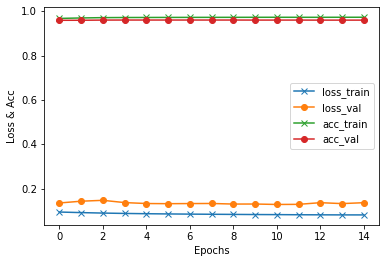

In [81]:
plt.plot(range(15),history_glove.history['loss'], label="loss_train", marker='x')
plt.plot(range(15),history_glove.history['val_loss'], label="loss_val", marker='o')
plt.plot(range(15),history_glove.history['acc'], label="acc_train", marker='x')
plt.plot(range(15),history_glove.history['val_acc'], label="acc_val", marker='o')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss & Acc')

## 2. Fastext

Voir ici :
https://fasttext.cc/ 

In [85]:
print('loading word embeddings...')

embeddings_index = {}
f = codecs.open('wiki-news-300d-1M-subword.vec', encoding='utf-8')

for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('found %s word vectors' % len(embeddings_index))


words_not_found = []
embed_dim = 300 
nb_words = min(MAX_NB_WORDS, len(word_index)+1)
embedding_matrix = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)

    if (embedding_vector is not None) and len(embedding_vector) > 0:
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' %
      np.sum(np.sum(embedding_matrix, axis=1) == 0))
      
      
#training params
batch_size = 16 
num_epochs = 40

#model parameters
num_filters = 64 
embed_dim = 300 
weight_decay = 1e-4

model_fastext = tf.keras.Sequential()

model_fastext.add(Embedding(nb_words,embed_dim,input_length=max_seq_len, weights=[embedding_matrix],trainable=False))
model_fastext.add(Flatten())
model_fastext.add(Dense(32,activation='relu'))
model_fastext.add(Dropout(0.4))
model_fastext.add(Dense(1,activation='sigmoid'))
model_fastext.summary()  

loading word embeddings...


999995it [00:43, 23250.08it/s]

found 999995 word vectors
number of null word embeddings: 7014


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,000,000 (11.44 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,000,000 (11.44 MB)

In [86]:
model_fastext.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_fastext = model_fastext.fit(x_train_pad, y_train, batch_size=16,
          epochs=15, validation_data=(x_val_pad, y_val), callbacks=[es_callback], shuffle=False)
                   

Epoch 1/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.8591 - loss: 0.3756 - val_accuracy: 0.9390 - val_loss: 0.1710
Epoch 2/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.9486 - loss: 0.1570 - val_accuracy: 0.9493 - val_loss: 0.1484
Epoch 3/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9546 - loss: 0.1362 - val_accuracy: 0.9483 - val_loss: 0.1408
Epoch 4/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.9546 - loss: 0.1300 - val_accuracy: 0.9523 - val_loss: 0.1369
Epoch 5/15
1237/1237 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9578 - loss: 0.1242 - val_accuracy: 0.9553 - val_loss: 0.1324


In [87]:
loss, acc = model_fastext.evaluate(x_test_pad, y_test)

print(f"La perte est de {loss} et l'accuracy {acc}.")

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9614 - loss: 0.1215
La perte est de 0.12605728209018707 et l'accuracy 0.9611901640892029.


In [91]:
length = len(history_fastext.history['loss'])

Text(0, 0.5, 'Loss & Acc')

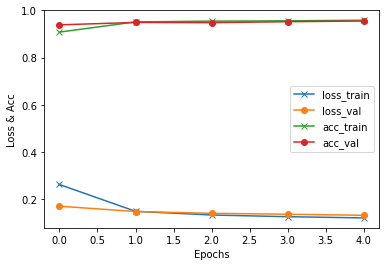

In [92]:
plt.plot(range(length),history_fastext.history['loss'], label="loss_train", marker='x')
plt.plot(range(length),history_fastext.history['val_loss'], label="loss_val", marker='o')
plt.plot(range(length),history_fastext.history['accuracy'], label="acc_train", marker='x')
plt.plot(range(length),history_fastext.history['val_accuracy'], label="acc_val", marker='o')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss & Acc')

Les résultats ne sont pas bons ! Pourquoi à votre avis ?

https://levelup.gitconnected.com/glove-and-fasttext-clearly-explained-extracting-features-from-text-data-1d227ab017b2

## 3. Word2Vec

Une dernière idée est de créer son propre plongement, je vous renvoie ici : 

https://radimrehurek.com/gensim/index.html

# On a parlé des embeddings, maintenant allons plus loin les neurones.
# Nous allons voir : RNN, LSTM, Bert et les transformers brièvement 

Pour se faire nous allons changer de jeu de données afin de détecter du Phishing .

In [95]:
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')
df.head()

df = df[['v1', 'v2']]

In [103]:
def spam_ham(str):
    if str=='ham':
        return 0
    elif str=='spam':
        return 1

In [104]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [106]:
df['Label'] = df['v1'].apply(lambda row : spam_ham(row)) 

In [108]:
df = df.rename(columns={'v2': 'text'})

In [109]:
x_train, x_test, y_train, y_test = train_test_split(
    df['text'], df['Label'], train_size=0.8, stratify=df['Label'], random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, train_size=0.8 ,stratify=y_train, random_state=42)
    
    
tokenizer = Tokenizer(num_words=10000,
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                     lower=True,
                     char_level=False #si True, chaque caractère est un token
                     )
    
tokens = tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_val_seq = tokenizer.texts_to_sequences(x_val)
x_test_seq = tokenizer.texts_to_sequences(x_test)


word_index = tokenizer.word_index

maxlen = 300

x_train_pad = sequence.pad_sequences(x_train_seq, maxlen=maxlen)
x_val_pad = sequence.pad_sequences(x_val_seq, maxlen=maxlen)
x_test_pad = sequence.pad_sequences(x_test_seq, maxlen=maxlen)

## Les réseaux récurrents

Les parties qui suivent sont librement inspirées (voir un peu plus du cours d'Introduction au deep learning de J.Rynkiewicz. On utilise aussi comme depuis le debut de le livre de François Chollet L'apprentissage profond avec Python édition machinelearning.fr / manning .

### Les RNN

L'idée des RNN est d'introduire une notion de temps dans l'algorithme.

On note :
+ $X_t$ l'observation au cours du temps, 
+ $h_t$ le vecteur d'état caché du réseau ,
+ $Y_t$ la sortie au temps $t$,
+ $\theta$ le vecteur des poids du modèles.

Comme tout réseau, le modèle est initialisé avec un vecteur d'état caché $h_0$. On peut alors visualiser le réseau comme un système dynamique :
$$
\left\{
    \begin{array}{ll}
        h_t = g_\theta(h_{t-1},X_t) \\
        Y_t = f_\theta(h_t)
    \end{array}
\right.
$$

<img src="rnn_simple.png" 
        alt="Picture" 
        style="display: block; margin: 0 auto" />
        
        
<img src="rnn_complet.png" 
        alt="Picture" 
        style="display: block; margin: 0 auto" />
        
Cela permet par exemple d'introduire une notion d'ordre des mots dans les textes. 

In [111]:
model_rnn = Sequential()

model_rnn.add(Embedding(10000, 32))
model_rnn.add(keras.layers.SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


history_rnn = model_rnn.fit(x_train_pad, y_train,
                   epochs=5,
                   batch_size=16,
                   validation_data=(x_val_pad, y_val))

Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - acc: 0.8561 - loss: 0.3896 - val_acc: 0.9731 - val_loss: 0.1114
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - acc: 0.9839 - loss: 0.0597 - val_acc: 0.9787 - val_loss: 0.0777
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - acc: 0.9957 - loss: 0.0182 - val_acc: 0.9821 - val_loss: 0.0654
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - acc: 0.9990 - loss: 0.0074 - val_acc: 0.9821 - val_loss: 0.0607
Epoch 5/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - acc: 0.9992 - loss: 0.0056 - val_acc: 0.9798 - val_loss: 0.0846


In [112]:
loss, acc = model_rnn.evaluate(x_test_pad, y_test)
print("loss :", loss, " et acc :", acc)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9820 - loss: 0.0702
loss : 0.07383625209331512  et acc : 0.9820627570152283


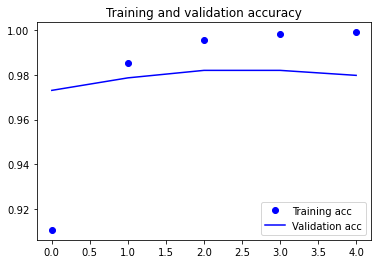

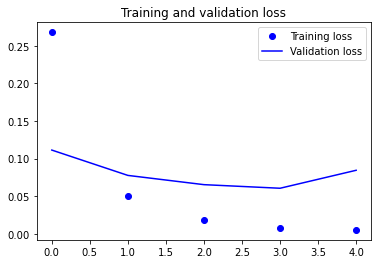

In [113]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Plusieurs remarques : 
+ les scores sont bons, 
+ c'est long à entraîner, 
+ On pourrait certainement avoir un bien meilleur score.

On va introduire de façon très légère une généralisation des RNN : les neurones LSTM via un schéma puis mettre en pratique.

Il existe aussi les neurones GRU et les versions Bidirectionnelles : on lit les documents dans le sens de lecture et le sens inverse pour améliorer les performances.

<img src="lstm_simple.png" 
        alt="Picture" 
        style="display: block; margin: 0 auto" />
        
        Un réseau LSTM simplifié !
        On rajoute un canal d'information avec la "retenue".

In [114]:
model_lstm = Sequential()

model_lstm.add(Embedding(10000, 32))
model_lstm.add(keras.layers.LSTM(32))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(60, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history_lstm = model_lstm.fit(x_train_pad, y_train,
                   epochs=20,
                   batch_size=16,
                   validation_data=(x_val_pad, y_val),
                   callbacks=[es_callback])

Epoch 1/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - acc: 0.8788 - loss: 0.3402 - val_acc: 0.9787 - val_loss: 0.0759
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - acc: 0.9943 - loss: 0.0298 - val_acc: 0.9809 - val_loss: 0.0651
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - acc: 0.9974 - loss: 0.0115 - val_acc: 0.9854 - val_loss: 0.0534
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - acc: 0.9983 - loss: 0.0064 - val_acc: 0.9809 - val_loss: 0.0860
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - acc: 0.9975 - loss: 0.0057 - val_acc: 0.9821 - val_loss: 0.0907
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - acc: 1.0000 - loss: 8.7880e-04 - val_acc: 0.9832 - val_loss: 0.0962
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - acc: 1.0000 - loss: 1.0447e-04 - val_acc: 0.9865 - val_loss: 0.0795
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - acc: 1.0000 - loss: 1.3980e-04 - val_acc: 0.9843 - val_loss: 0.1010


In [115]:
model_lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 300, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 60)             │         1,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,085 (3.78 MB)

 Trainable params: 330,361 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 660,724 (2.52 MB)

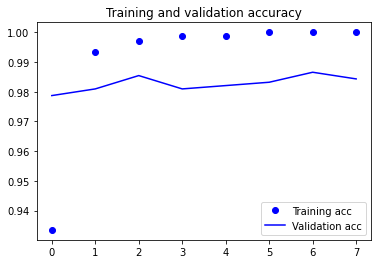

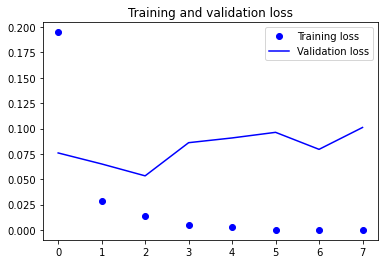

In [116]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [117]:
loss, acc = model_lstm.evaluate(x_test_pad, y_test)
print("loss :", loss, " et acc :", acc)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.9883 - loss: 0.1004
loss : 0.10068593919277191  et acc : 0.9874439239501953


# Un peu de transfert learning avec les transformers

Pour rappels les transformers sont des réseaux de neurones particuliers de type encoder-decoder 
avec des couches utilisant le phénomène d'attention.
C'est cela qui a permis une révolution du NLP à partir de 2017.



In [118]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

In [119]:
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
# le modèle n'existe qu'en PyTorch , on utilise from_pt pour l'importer en tensorflow
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [120]:
from sklearn.metrics import classification_report

In [121]:
x_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [122]:
classifier(x_train[0])

[{'label': 'NEGATIVE', 'score': 0.9916266202926636}]

In [123]:
def labeling(text):
    if text == 'NEGATIVE':
        return 0
    elif text == 'POSITIVE':
        return 1

In [124]:
from tqdm import tqdm

In [125]:
y_pred = []
indices = []
for i in range(500):
    try:
        c = classifier(x_train[i])
        indices.append(i)
        y_pred.append(c)
    except:
        pass

In [126]:
y_pred

[[{'label': 'NEGATIVE', 'score': 0.9916266202926636}],
 [{'label': 'NEGATIVE', 'score': 0.9911950826644897}],
 [{'label': 'NEGATIVE', 'score': 0.9950916767120361}],
 [{'label': 'POSITIVE', 'score': 0.9869717955589294}],
 [{'label': 'NEGATIVE', 'score': 0.9959768652915955}],
 [{'label': 'NEGATIVE', 'score': 0.9676997661590576}],
 [{'label': 'NEGATIVE', 'score': 0.9877546429634094}],
 [{'label': 'POSITIVE', 'score': 0.9998486042022705}],
 [{'label': 'POSITIVE', 'score': 0.9994812607765198}],
 [{'label': 'NEGATIVE', 'score': 0.9966681599617004}],
 [{'label': 'POSITIVE', 'score': 0.9497026801109314}],
 [{'label': 'NEGATIVE', 'score': 0.5919306874275208}],
 [{'label': 'NEGATIVE', 'score': 0.9973033666610718}],
 [{'label': 'NEGATIVE', 'score': 0.9990921020507812}],
 [{'label': 'NEGATIVE', 'score': 0.9972934126853943}],
 [{'label': 'NEGATIVE', 'score': 0.9876480102539062}],
 [{'label': 'POSITIVE', 'score': 0.9995300769805908}],
 [{'label': 'POSITIVE', 'score': 0.9606907963752747}],
 [{'label'

In [127]:
y_pred = [y_pred[i][0]['label'] for i in range(len(y_pred))]
y_pred = [labeling(y_pred[i]) for i in range(len(y_pred))]

Ici il n'y a même pas besoin de préprocessing !

In [128]:
print(classification_report(y_train[indices], y_pred))

              precision    recall  f1-score   support

           0       0.82      0.58      0.68       286
           1       0.06      0.18      0.09        44

    accuracy                           0.53       330
   macro avg       0.44      0.38      0.39       330
weighted avg       0.72      0.53      0.60       330



# Finissons sur Bert le game changer

https://www.quantmetry.com/glossaire/bert-nlp/
https://datascientest.com/bert-un-outil-de-traitement-du-langage-innovant
https://fr.wikipedia.org/wiki/BERT_(mod%C3%A8le_de_langage)

Mais surtout : https://arxiv.org/pdf/1810.04805.pdf

In [129]:
num_classes = 2

In [137]:
#from transformers import *
from transformers import BertTokenizer, TFBertModel, BertConfig,  TFBertForSequenceClassification
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=num_classes)

loading file vocab.txt from cache at /home/cytech/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /home/cytech/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/tokenizer_config.json
loading file tokenizer.json from cache at /home/cytech/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/tokenizer.json
loading configuration file config.json from cache at /home/cytech/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpo

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /home/cytech/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/model.safetensors
Loaded 109,482,240 parameters in the TF 2.0 model.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [138]:
sentences = x_train
labels = y_train
len(sentences),len(labels)

(3565, 3565)

In [139]:
input_ids=[]
attention_masks=[]

for sent in tqdm(sentences):
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,
                                        max_length =64,pad_to_max_length = True,
                                        return_attention_mask = True,
                                        truncation=True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

100%|█████████████████████████████████████| 3565/3565 [00:00<00:00, 3984.23it/s]


In [140]:
import pickle

print('Preparing the pickle file.....')

pickle_inp_path='./bert_inp.pkl'
pickle_mask_path='./bert_mask.pkl'
pickle_label_path='./bert_label.pkl'

pickle.dump((input_ids),open(pickle_inp_path,'wb'))
pickle.dump((attention_masks),open(pickle_mask_path,'wb'))
pickle.dump((labels),open(pickle_label_path,'wb'))


print('Pickle files saved as ',pickle_inp_path,pickle_mask_path,pickle_label_path)

Preparing the pickle file.....
Pickle files saved as  ./bert_inp.pkl ./bert_mask.pkl ./bert_label.pkl


In [141]:
print('Loading the saved pickle files..')

input_ids=pickle.load(open(pickle_inp_path, 'rb'))
attention_masks=pickle.load(open(pickle_mask_path, 'rb'))
labels=pickle.load(open(pickle_label_path, 'rb'))

print('Input shape {} Attention mask shape {} Input label shape {}'.format(input_ids.shape,attention_masks.shape,labels.shape))

Loading the saved pickle files..
Input shape (3565, 64) Attention mask shape (3565, 64) Input label shape (3565,)


In [142]:

train_inp, val_inp, train_label, val_label, train_mask, val_mask = train_test_split(
    input_ids, labels, attention_masks, test_size=0.2, stratify=labels ,random_state=42)

print('Train inp shape {} Val input shape {}\nTrain label shape {} Val label shape {}\nTrain attention mask shape {} Val attention mask shape {}'.format(
    train_inp.shape, val_inp.shape, train_label.shape, val_label.shape, train_mask.shape, val_mask.shape))

Train inp shape (2852, 64) Val input shape (713, 64)
Train label shape (2852,) Val label shape (713,)
Train attention mask shape (2852, 64) Val attention mask shape (713, 64)


In [150]:
model_save_path='./bert_model.weights.h5'

log_dir='tensorboard_data/tb_bert'

**A vous de débugger !**

In [151]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path, save_weights_only=True,
                                                monitor='val_loss', mode='min', save_best_only=True),
             tf.keras.callbacks.TensorBoard(log_dir=log_dir)]

print('\nBert Model', bert_model.summary())

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)

bert_model.compile(loss=loss, optimizer=optimizer, metrics=[metric])

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_57 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Bert Model None


AttributeError: 'Variable' object has no attribute '_distribute_strategy'

ET OUI QUASIMENT 110 MILLIONS DE PARAMÈTRES!

In [151]:
history = bert_model.fit([train_inp, train_mask], train_label, batch_size=32,
                         epochs=4, validation_data=([val_inp, val_mask], val_label), callbacks=callbacks)

Epoch 1/4


  0%|▏                                      | 2/500 [15:32<64:31:13, 466.41s/it]


800/800 [==============================] - 157s 185ms/step - loss: 0.4143 - accuracy: 0.8052 - val_loss: 0.3544 - val_accuracy: 0.8405
Epoch 2/4
800/800 [==============================] - 147s 184ms/step - loss: 0.2795 - accuracy: 0.8810 - val_loss: 0.3435 - val_accuracy: 0.8481
Epoch 3/4
800/800 [==============================] - 143s 178ms/step - loss: 0.1608 - accuracy: 0.9373 - val_loss: 0.4201 - val_accuracy: 0.8472
Epoch 4/4
800/800 [==============================] - 143s 179ms/step - loss: 0.0817 - accuracy: 0.9720 - val_loss: 0.5454 - val_accuracy: 0.8422


In [152]:
model_save_path='./bert_model.h5'

trained_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)
trained_model.compile(loss=loss,optimizer=optimizer, metrics=[metric])
trained_model.load_weights(model_save_path)

preds = trained_model.predict([val_inp,val_mask],batch_size=32)

pred_labels = np.argmax(preds[0], axis=1)

print('Classification Report')
print(classification_report(val_label,pred_labels))

print('Training and saving built model.....')

loading configuration file config.json from cache at /home/jordy/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at /home/jordy/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tf_model.h5
All model checkpoint layers wer

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3200
           1       0.86      0.84      0.85      3200

    accuracy                           0.85      6400
   macro avg       0.85      0.85      0.85      6400
weighted avg       0.85      0.85      0.85      6400

Training and saving built model.....


Pour aller plus voir et découvrir les autres taches du NLP comme les NER, voir : 
    https://keras.io/